In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans,AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

 EXPLORE THE DATA

In [29]:
df=pd.read_csv("Country-data.csv")
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [30]:
df.shape

(167, 10)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [32]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<Axes: >

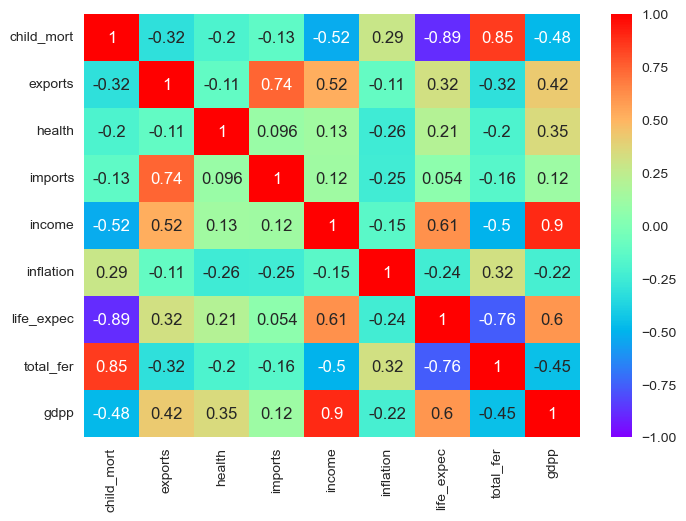

In [33]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap="rainbow",vmax=1,vmin=-1)

GOOD CORR BETWEEN INCOME AND GDP
LIFE_EXPECTANCY AND TOTAL_FERTILITY HAS NEGATIVE RELATION

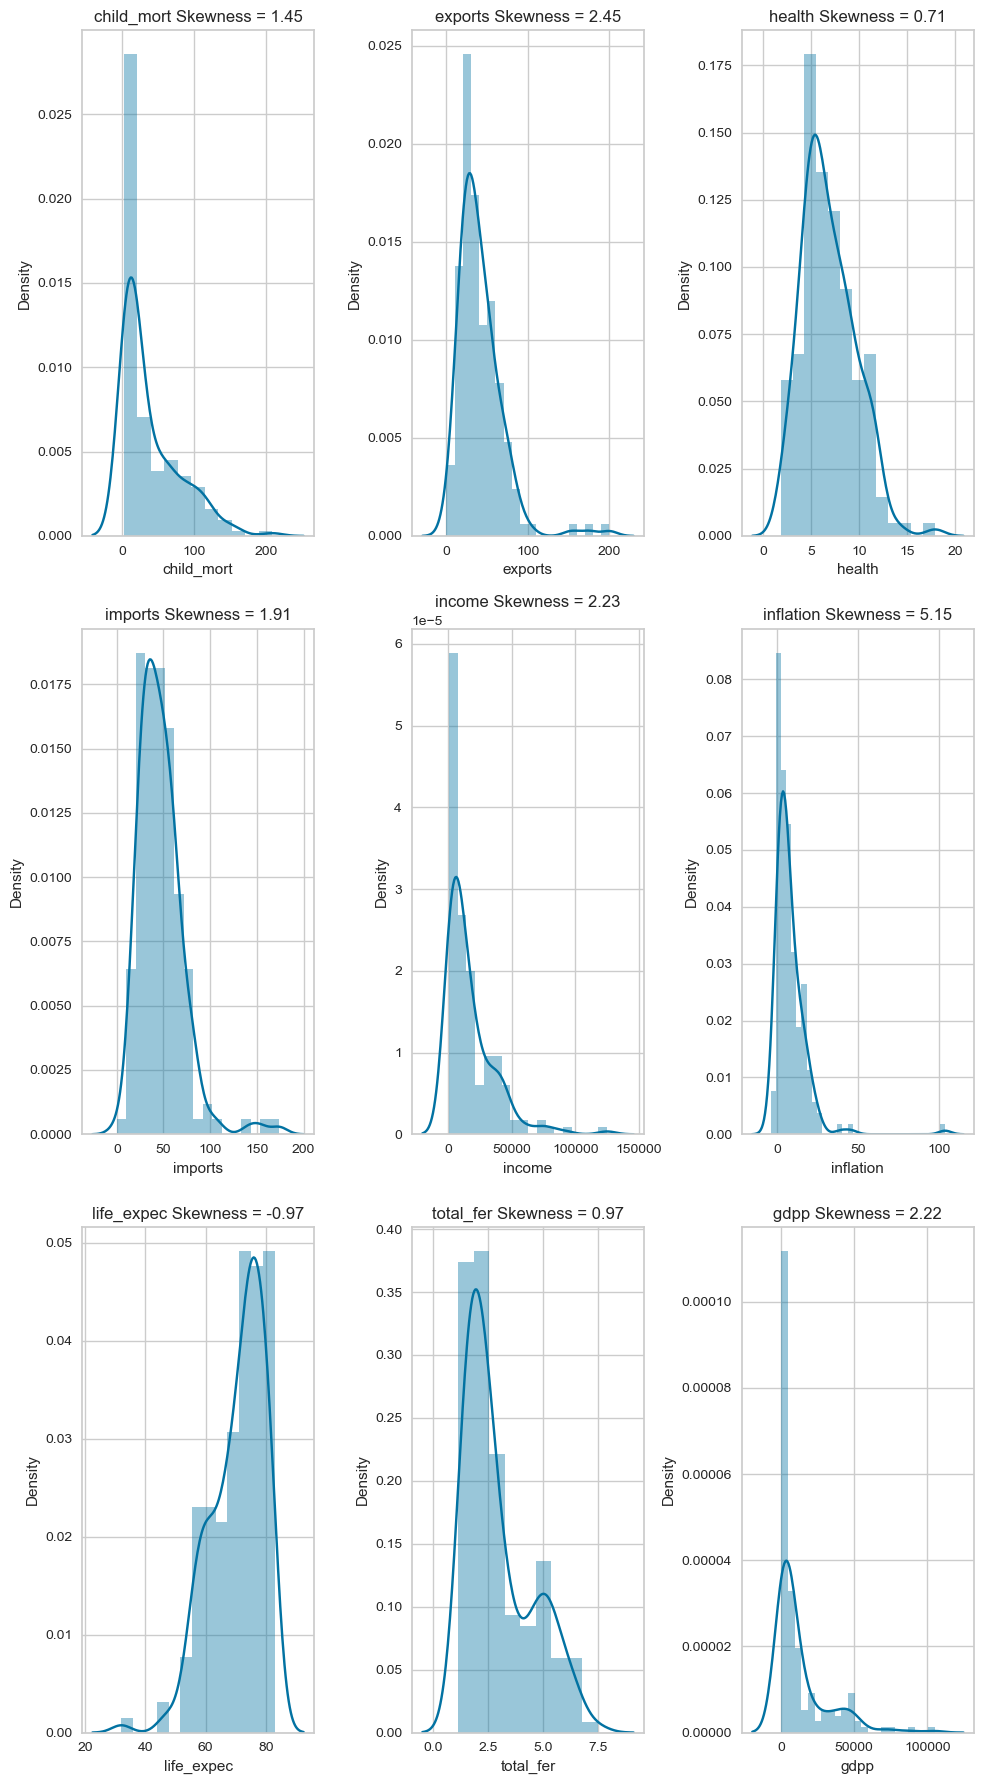

In [34]:
# Distributin of numeric columns
t=1
plt.figure(figsize=(10,18))
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(3,3,t)
    sns.distplot(df[i])
    plt.title(f'{i} Skewness = {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()


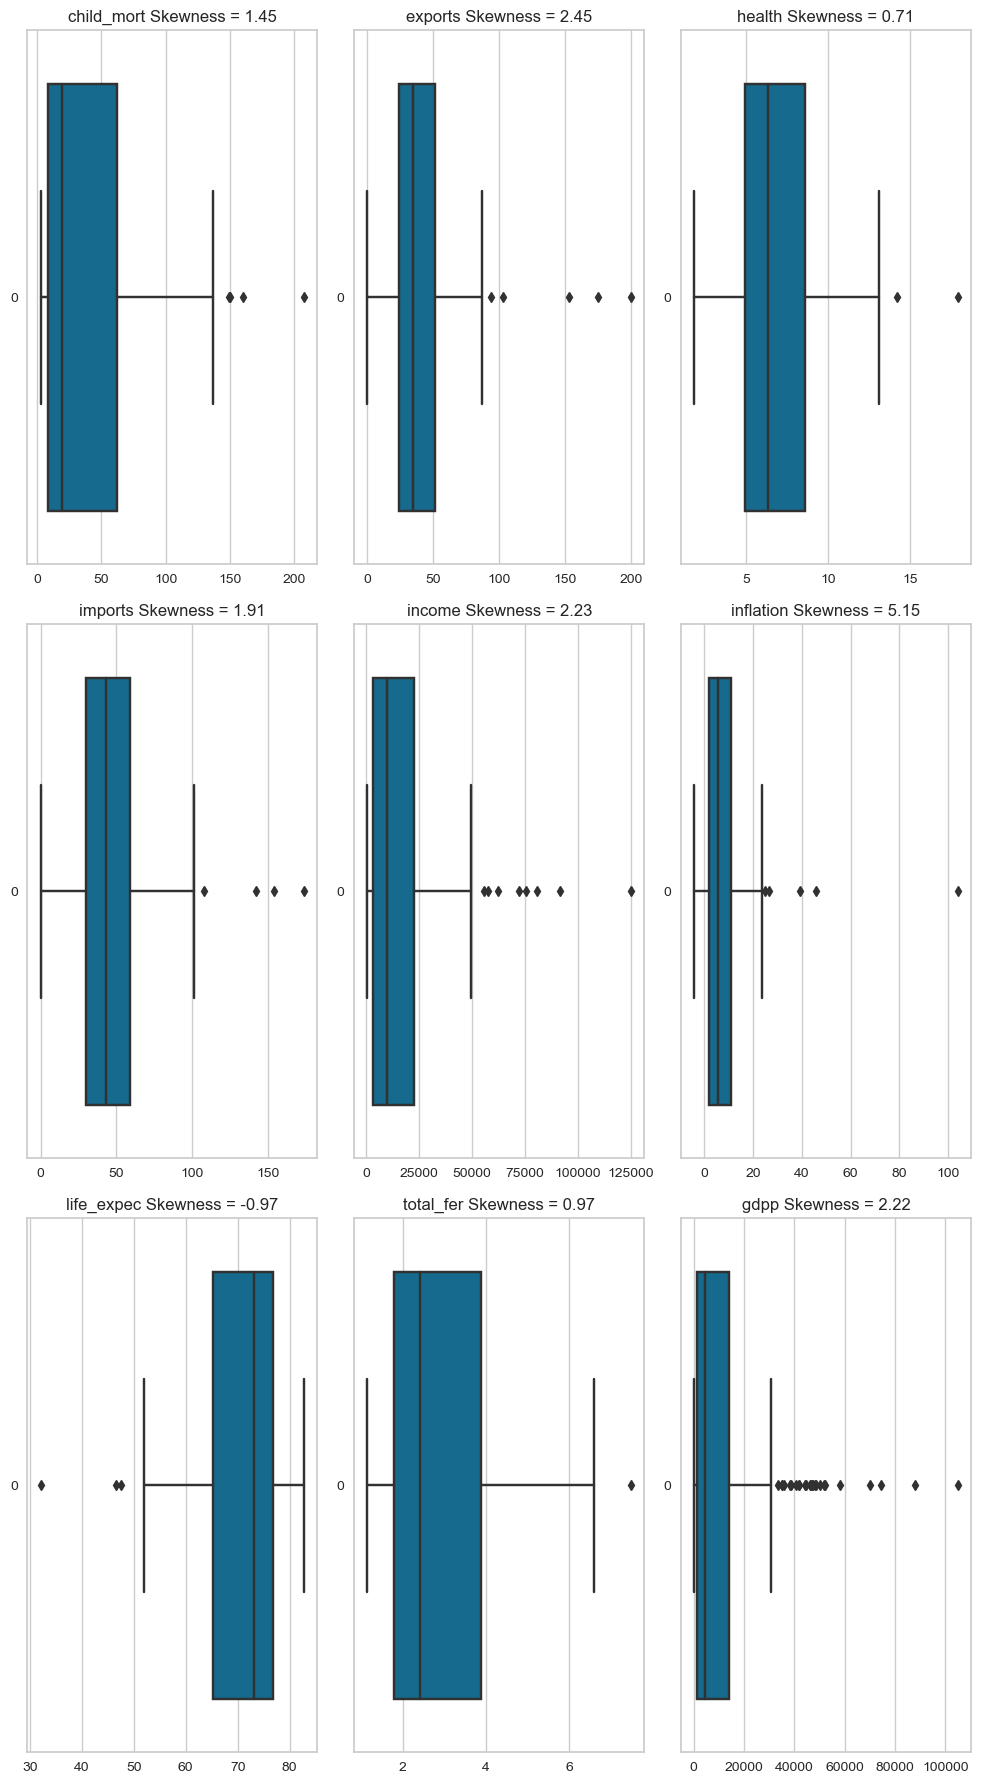

In [35]:
# check for outliers
t=1
plt.figure(figsize=(10,18))
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(df[i],orient='h')
    plt.title(f'{i} Skewness = {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()


In [36]:
# as the data is already less, we will use percentile to cap the outliers


for i in df.select_dtypes(np.number).columns:
    ul=np.percentile(df[i],99)                    # or np.quantile(df[i],0.99) and np.quantile(df[i],0.01)
    ll=np.percentile(df[i],1)
    df[i]=np.where(df[i]>ul,ul,df[i])
    df[i]=np.where(df[i]<ll,ll,df[i])

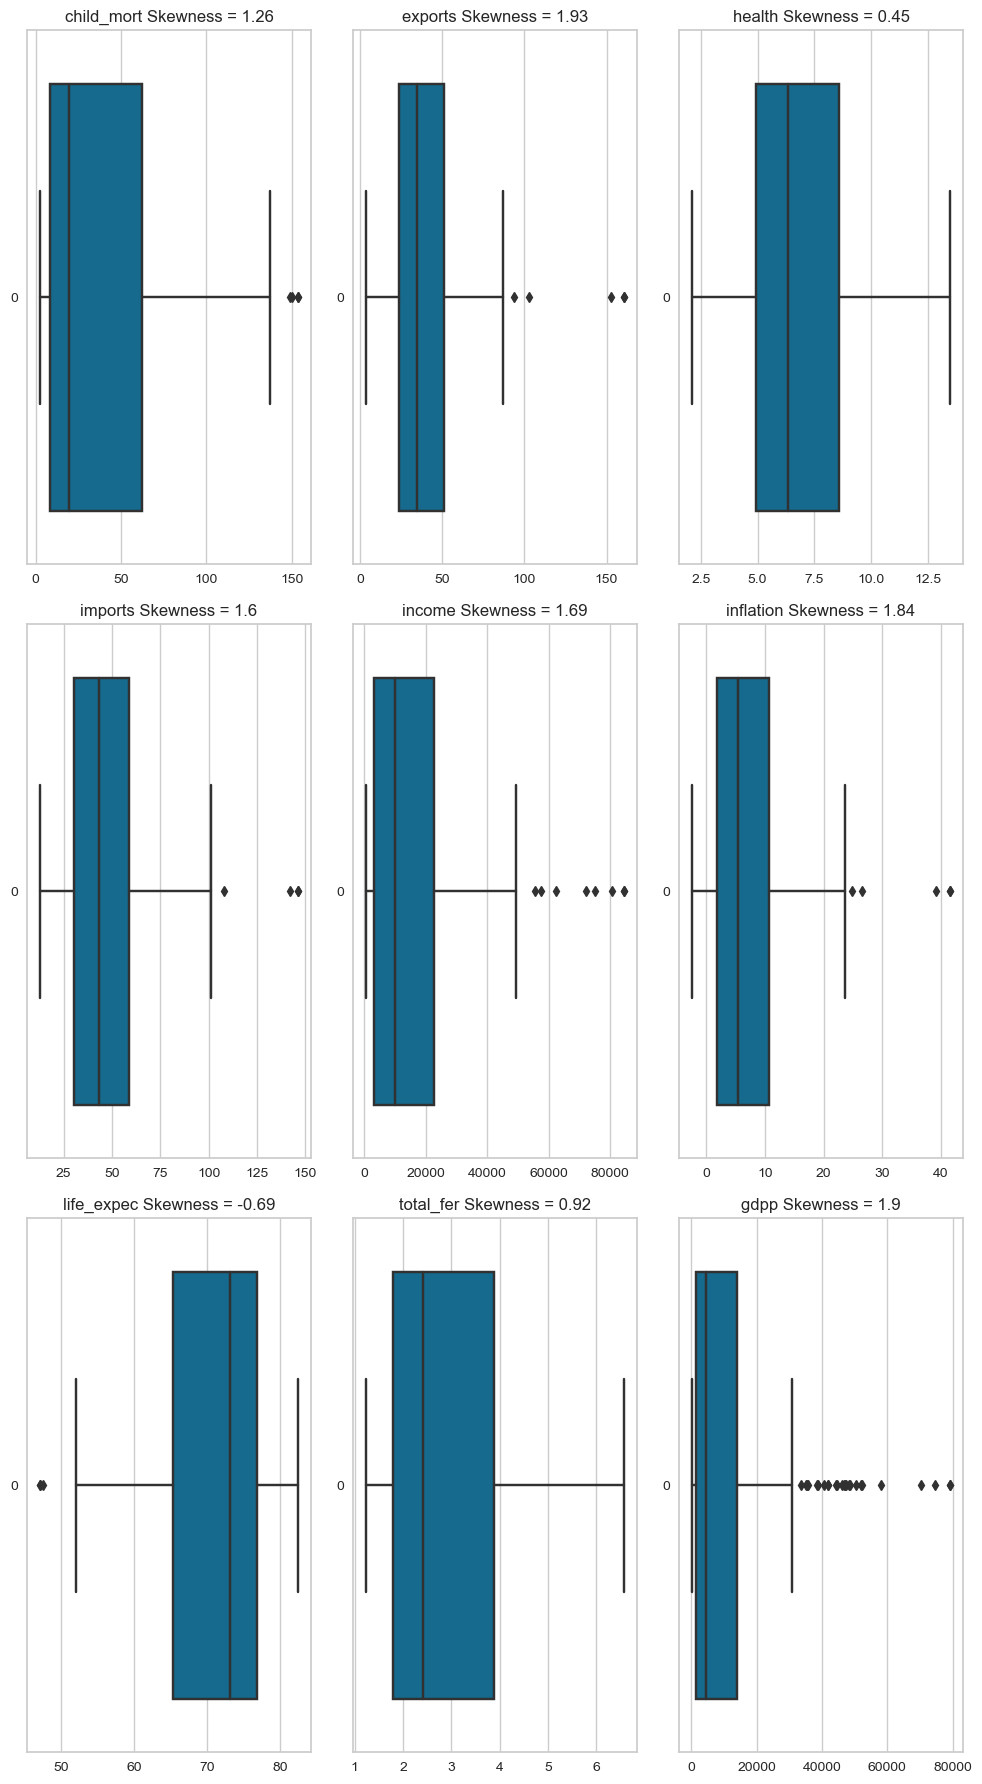

In [37]:
t=1
plt.figure(figsize=(10,18))
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(df[i],orient='h')
    plt.title(f'{i} Skewness = {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()


In [38]:
# Scale the data


ss=StandardScaler()

In [39]:
df_=df.drop("country",axis=1)
df_sc=ss.fit_transform(df_)

df_sc=pd.DataFrame(df_sc,columns=df_.columns)
print(df_sc.shape)
df_sc.head(20)


(167, 9)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-1.202883,0.300762,-0.080933,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.500319,-0.090190,0.080055,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.094393,-0.993555,-0.668322,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,0.838457,-1.494581,-0.167954,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,0.182730,-0.287564,0.528210,0.125202,-0.768917,0.721681,-0.544433,-0.032079
5,-0.601514,-0.855504,0.498136,-1.338379,0.102859,1.742799,0.604425,-0.383694,-0.141416
6,-0.508993,-0.781345,-0.906255,-0.063529,-0.567449,0.048101,0.311284,-0.839122,-0.548840
7,-0.850809,-0.820376,0.737262,-1.125179,1.370858,-0.805057,1.331414,-0.678383,2.252485
8,-0.863659,0.409112,1.598875,0.045246,1.471404,-0.842100,1.155529,-1.006558,1.964757
9,0.033288,0.526206,-0.344499,-1.133881,-0.047961,0.826397,-0.181193,-0.685080,-0.398070


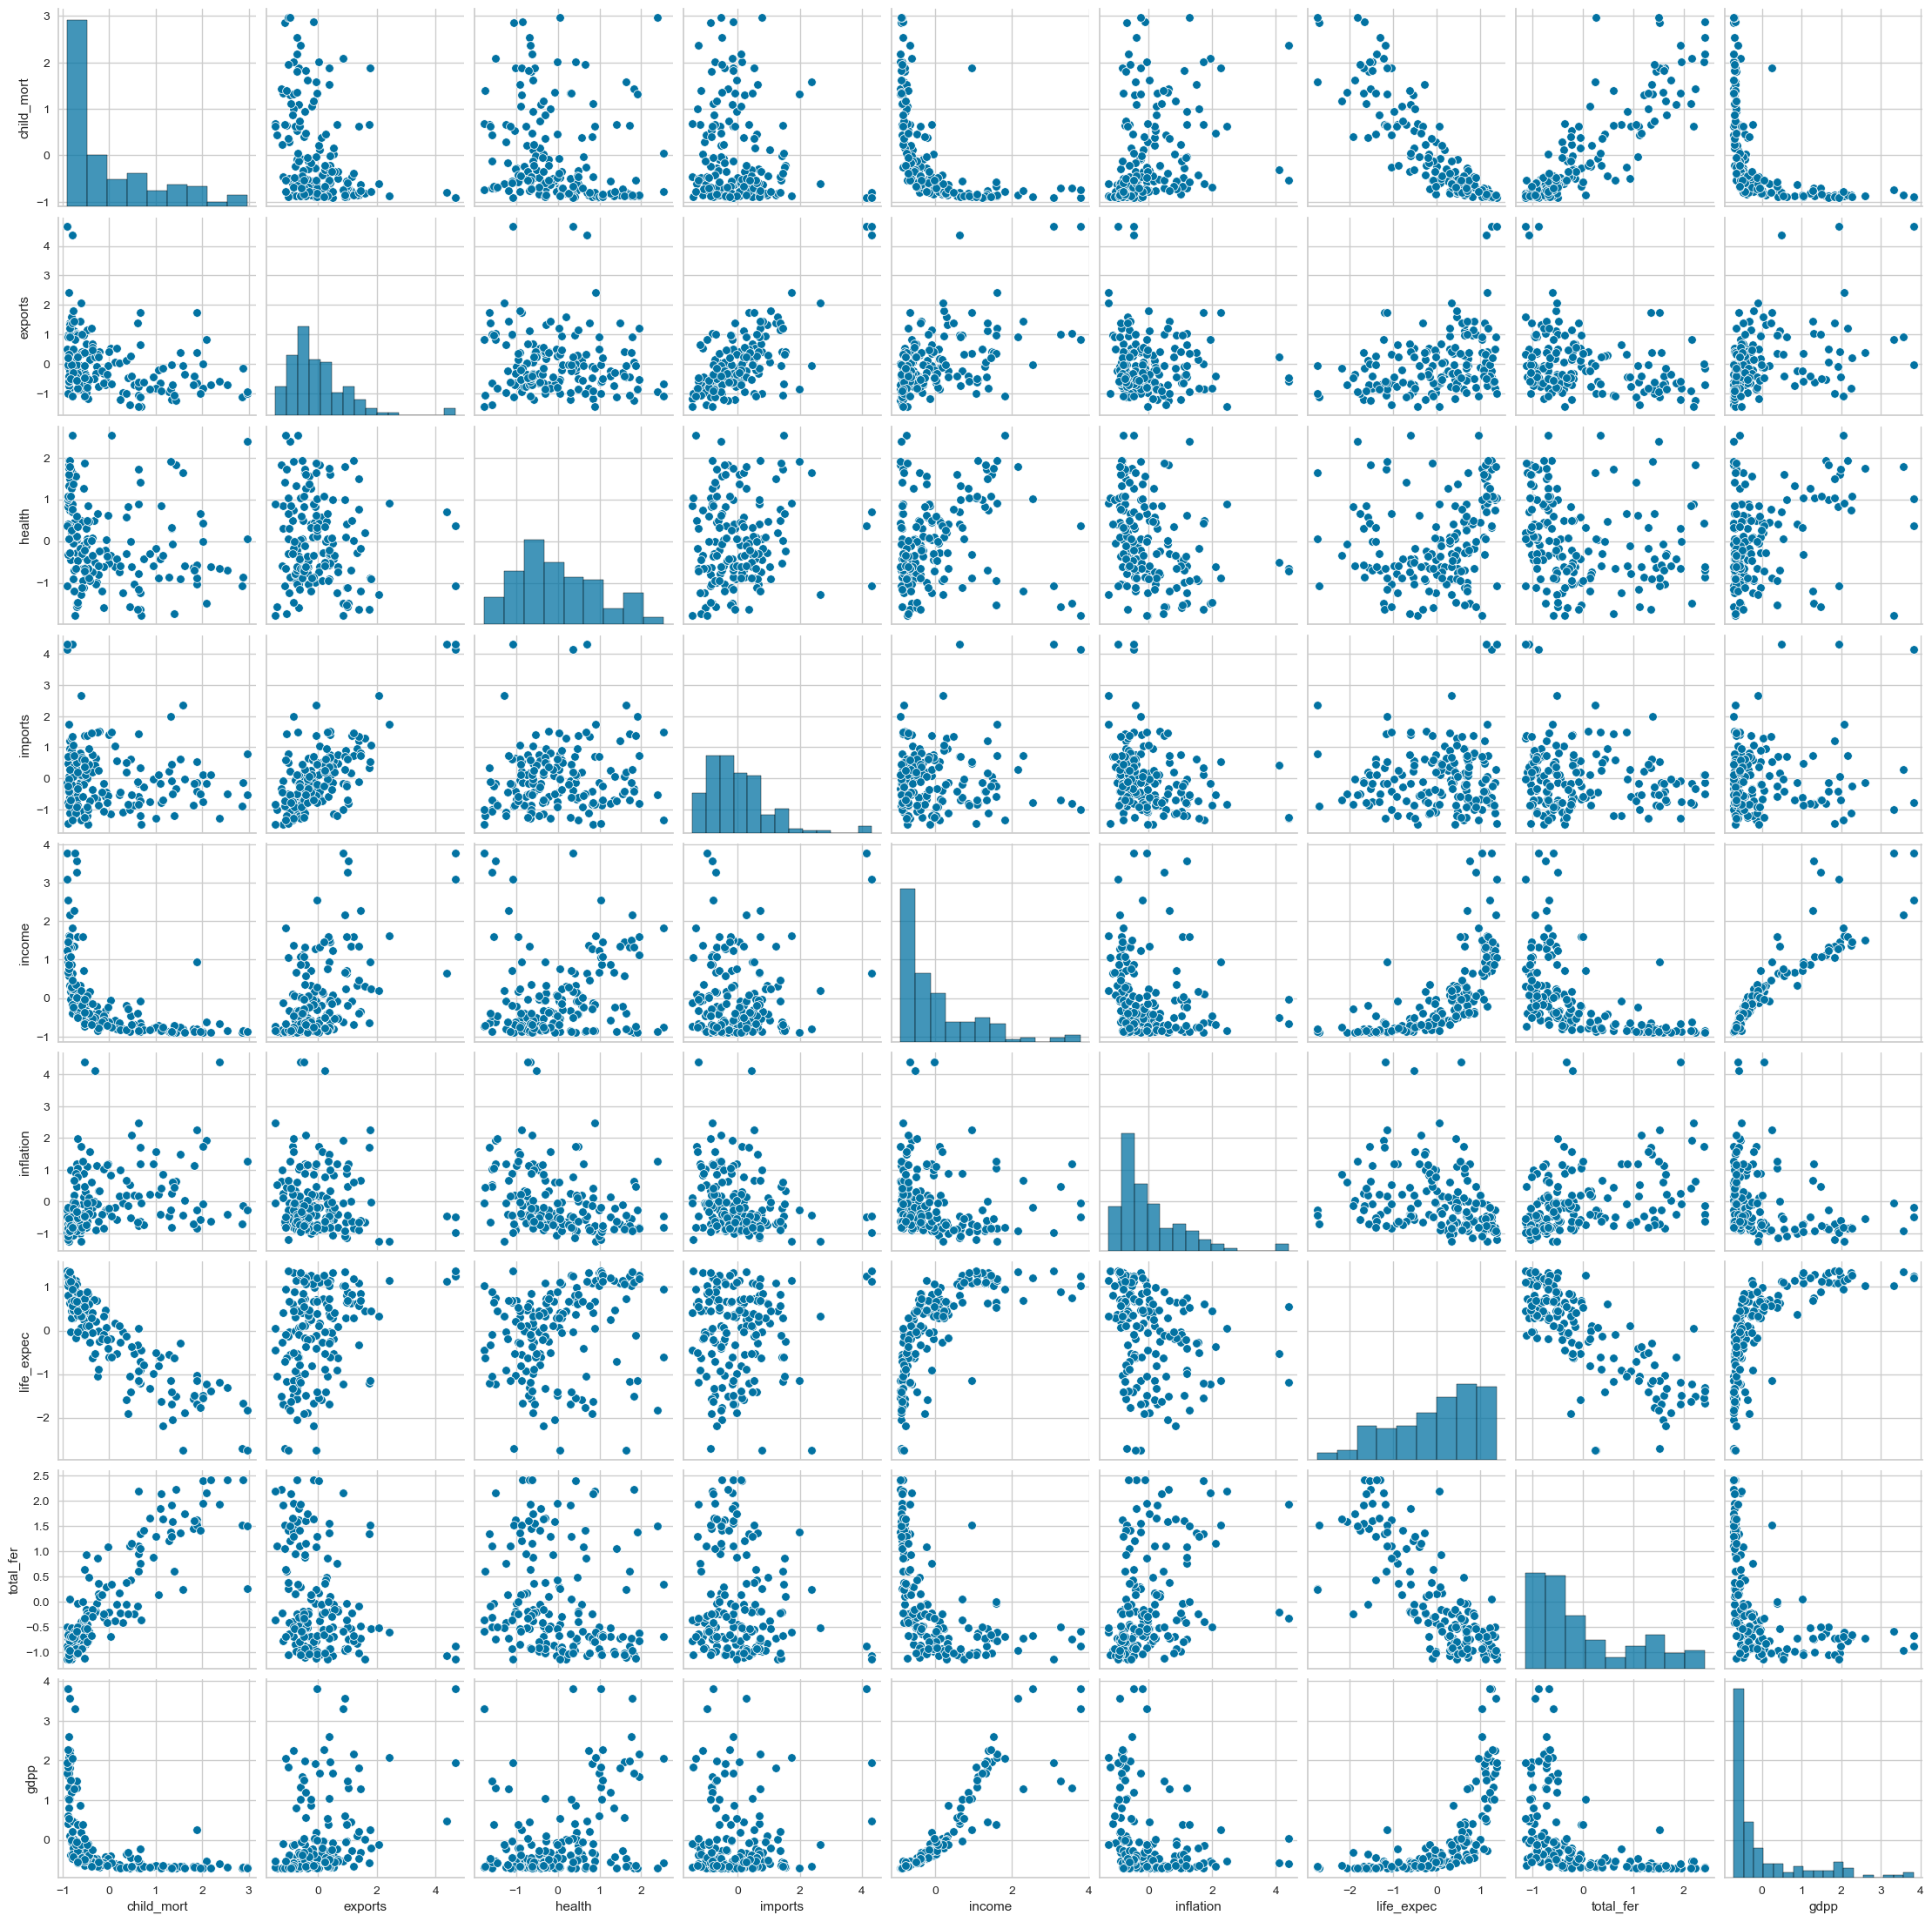

In [40]:
# PAIRPLOT

sns.pairplot(df_sc)

# PCA



In [41]:
pca=PCA(n_components=9)

pca.fit(df_sc)                  # will calculate eigen values and vectors

PCA(n_components=9)

In [42]:
pca.explained_variance_          #eigen values

array([4.27823733, 1.53037471, 1.21746675, 0.96172041, 0.61715173,
       0.18503179, 0.12391253, 0.08721568, 0.05310593])

In [43]:
pca.components_               # eigen vectors

array([[-0.41726822,  0.27138025,  0.15950225,  0.14988929,  0.40179958,
        -0.21101414,  0.42673912, -0.40427841,  0.39091565],
       [ 0.15811444,  0.61808939, -0.22289926,  0.69047896,  0.00088782,
        -0.02051079, -0.20266464,  0.12929416, -0.09115167],
       [-0.08222017,  0.17918771, -0.64603528, -0.28084611,  0.25192669,
         0.61700198,  0.1258854 , -0.03307375,  0.06161153],
       [ 0.38166407,  0.0654358 ,  0.33020538, -0.09845132,  0.43835623,
         0.16126257, -0.19421207,  0.41944978,  0.54726976],
       [-0.17481499,  0.0495134 ,  0.56885959,  0.2209066 , -0.17136541,
         0.72403572,  0.07115164, -0.10543437, -0.15752585],
       [ 0.14479863, -0.03341491,  0.02006627, -0.05405535,  0.17413799,
         0.04878959, -0.66473806, -0.70635335,  0.03280188],
       [-0.07765504, -0.69853047, -0.24956609,  0.59372405,  0.12236614,
         0.12896139, -0.00382699,  0.01858187,  0.24345216],
       [ 0.75957181, -0.02724499, -0.01720575,  0.07112634, -0

In [44]:
pca.explained_variance_ratio_.cumsum()         

array([0.47251324, 0.64153666, 0.77600072, 0.88221867, 0.95038048,
       0.97081645, 0.98450207, 0.99413467, 1.        ])

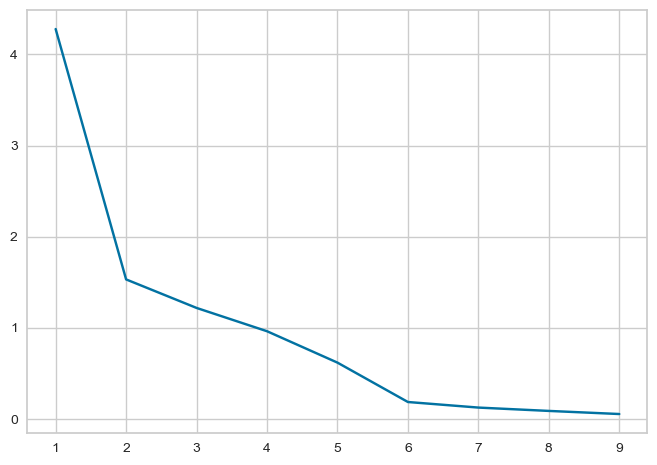

In [45]:
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [46]:
# lets reduce the data to pc=4 which gives 88% variance


pca=PCA(n_components=4)
df_pca=pca.fit_transform(df_sc)

df_pca=pd.DataFrame(df_pca,columns=range(1,5))

df_pca.head()


,1,2,3,4
0,-3.025658,-0.003637,-0.869758,0.963519
1,0.452028,-0.513954,-0.256504,-1.274491
2,-0.375785,-0.464859,1.530583,-0.697769
3,-3.166567,1.602272,1.772517,1.270583
4,1.107019,0.231739,-0.207497,-0.860967


# K-MEANS CLUSTERING 

In [47]:
n_clusters=[2,3,4,5,6,7,8,9]

wcss=[]

for i in n_clusters:
    model=KMeans(n_clusters=i)
    model.fit(df_pca)
    wcss.append(model.inertia_)                         # inertia,distortion score and wcss ,all are same

In [48]:
wcss

[848.8945648206658,
 627.7064017457415,
 516.7988333484607,
 432.6504956132252,
 381.14574440031254,
 339.58326142062805,
 303.3225770389522,
 274.71690053320964]

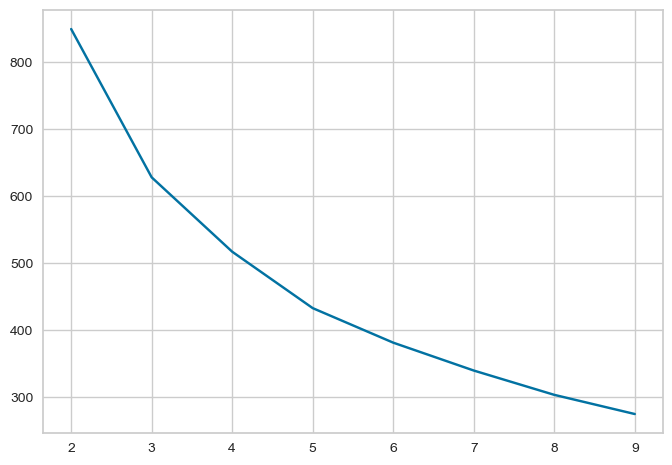

In [49]:
plt.plot(n_clusters,wcss)

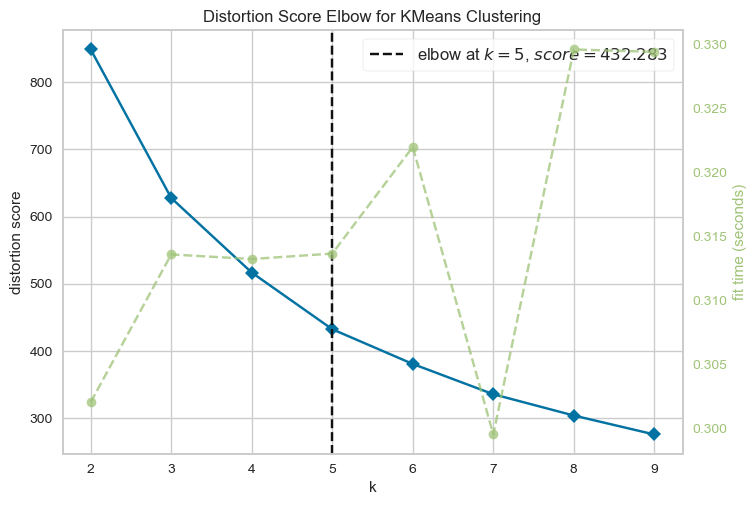

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
K_elbow=KElbowVisualizer(KMeans(),k=9)
K_elbow.fit(df_pca)
K_elbow.show()

In [51]:
# lets try silhouette score
n_clusters=[2,3,4,5,6,7,8,9]

sil_score=[]
for i in n_clusters:
    model=KMeans(n_clusters=i)
    model.fit(df_pca)
    pred=model.predict(df_pca)
    sil_score.append(silhouette_score(df_pca,pred))
print(sorted(sil_score)

SyntaxError: incomplete input (3386941811.py, line 10)

In [ ]:
pd.DataFrame({"K":n_clusters,"Silhouette_score":sil_score})    # silhouette score is maximum for k=4


In [ ]:
t=1
for j in n_clusters:                    # identify value of k
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=j)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(df_pca)
    plt.title(f'K={j},Silhouette Score is {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

# k=3 has good dender clusters and better silhourtte score and the outliers are also less. Hence we can build model with k=3

In [53]:
final_cluster=3
k_final=KMeans(n_clusters=final_cluster)
k_final.fit(df_pca)

KMeans(n_clusters=3)

In [54]:
pred_kmeans=k_final.predict(df_pca)

print(pred_kmeans)

[1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 1 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


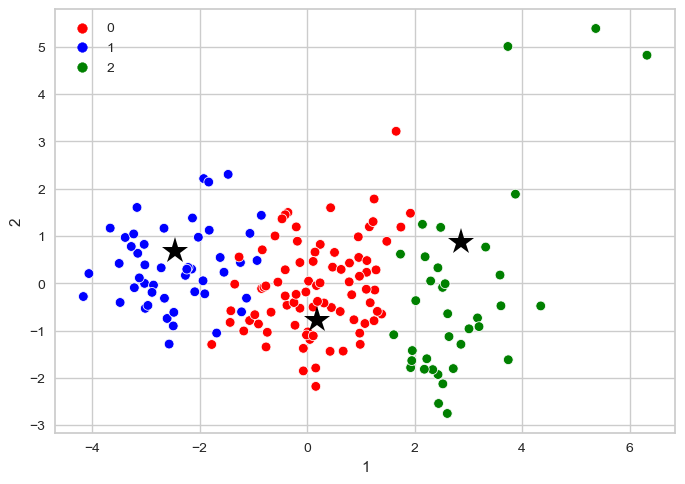

In [55]:
clusters=k_final.cluster_centers_

sns.scatterplot(x=df_pca[1],y=df_pca[2],hue=pred_kmeans,palette=["red","blue","green"])
for i in range(3):
    plt.plot(clusters[i][0],clusters[i][-1],marker="*",ms=20,color="black")
    plt.plot()

In [ ]:
print("SILHOUETTE SCORE FOR K MEANS MODEL(K=3) IS:",silhouette_score(df_pca,pred_kmeans))

In [ ]:
# appending the label col to original df , before scaling
df["Lable_Kmeans"]=pred_kmeans
df.head(10)

# HIERARCHIAL CLUSTERING-AGGLOROMATIVE CLUSTERING

In [ ]:
df_pca.shape

In [ ]:
dist_mat=euclidean_distances(df_pca)
actual_distance=dist_mat[np.triu_indices(167,k=1)]

In [ ]:
def draw_dendrogram(link_method):
  
    linkage_matrix=linkage(df_pca,method=link_method)
    coeff,cophenetic_dist=cophenet(linkage_matrix,actual_distance)
    plt.title(f'Dendrogram and Method is :{link_method},Coefficicient is ={round(coeff,2)}')
    dendrogram(linkage_matrix)
    plt.show()

In [ ]:
draw_dendrogram("single")

In [ ]:
draw_dendrogram('ward')

In [ ]:
draw_dendrogram('complete')

In [ ]:
draw_dendrogram('average')

In [ ]:
draw_dendrogram('centroid')

In [ ]:
# ward and complete gives better dendrogram
# try with both models

In [ ]:
# MODEL 1: METHOD:COMPLETE(K=3)
# MODEL 2: METHOD: WARD(K=2)



model1=AgglomerativeClustering(n_clusters=3,linkage="complete")

pred_c=model1.fit_predict(df_pca)

print("Silhouette score for model 1:",silhouette_score(df_pca,pred_c))

In [ ]:
model2=AgglomerativeClustering(n_clusters=2,linkage="ward")
model2.fit(df_pca)
pred_w=model2.fit_predict(df_pca)

print("Silhouette score for model 2:",silhouette_score(df_pca,pred_w))


In [ ]:
# complete model gives better silhourtte score

final_model=AgglomerativeClustering(n_clusters=3,linkage="complete")
pred_agglo=final_model.fit_predict(df_pca)
pred_agglo


In [ ]:
print("SILHOUETTE SCORE FOR K MEANS MODEL(K=3) IS:",silhouette_score(df_pca,pred_agglo))

In [ ]:
clusters=AgglomerativeClustering

sns.scatterplot(x=df_pca[1],y=df_pca[2],hue=pred_agglo,palette=["red","blue","green"])
plt.show()

In [ ]:
df["Lable_Agglo"]=pred_agglo
df.head(15)

In [ ]:
df.columns


In [ ]:
df.Lable_Kmeans.value_counts().plot(kind="bar")     # has better distribution

In [ ]:
df.Lable_Agglo.value_counts().plot(kind="bar")

1. THE DISTRIBUTION IN KMEANS IS QUITE EVEN AND WE ARE GETTNG GOOD DATAPOINTS IN CLUSTERS.WHILE IN AGGLOMERATIVE
CLUSTER 1 IS ONLY GETTING 4 DATA POINTS.

2. THE SILHOUETTE SCORE FOR K MEANS MODEL(0.33) IS BETTER THAN AGGLOMERATIVE MODEL(0.318)

Therefore on the basis of these 2 points, it is better to go with Kmeans(k=3) to form better clusters

In [ ]:
# as both model kmeans and aggloromative ,gives 3 clusters, k means has higher silhouette score, hence k means will
# fetch better model

# Lets putpredictions to final model to origina data

df.drop("Lable_Agglo",axis=1,inplace=True)

In [ ]:
df.rename(columns={"Lable_Kmeans":"Label"},inplace=True)

In [ ]:
df.head(10)

# BUSINESS INTERPRETATION

In [ ]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

In [ ]:
df.groupby(by="Label")[num_cols].mean()

1.Label 2 has least mortality, good exports, good health ,higher income rate, higher life expectancy and higher gdp-DEVELOPED COUNTRY

2.Label 1 is performing poorly in all aspects- LEAST DEVELOPED

3.Label 0 is performing decent in all aspects- DEVELOPING COUNTRY

In [ ]:
df["Label"]=df.Label.map({0:"Developing Country",1:"Least Developed",2:"Developed Country"})
df.head(10)

In [ ]:
# Developed countries
print(df[df.Label=="Developed Country"]["country"].count())

df[df.Label=="Developed Country"]["country"]


In [ ]:
# least developed
print(df[df.Label=="Least Developed"]["country"].count())

df[df.Label=="Least Developed"]["country"]

In [ ]:
print(df[df.Label=="Developing Country"]["country"].count())
df[df.Label=="Developing Country"]["country"]

In [ ]:
import plotly.express as px


fig=px.choropleth(df[["country","Label"]],
                   locationmode="country names",
                    locations="country",
                    color="Label",
                    color_discrete_map={"Developed Country":"lightblue",
                                      "Least Developed":"red",
                                      "Developing Country":"lightgreen"})

fig.show()